In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM
from keras.models import Sequential
import seaborn as sns
sns.set_theme(style="whitegrid")

### Reading Dataset

In [3]:
df_k = pd.read_csv('Gold Price (2013-2023).csv')

In [4]:
df = pd.read_csv('Gold_Price_daily.csv')

In [5]:
df = df.drop(columns={'Adj Close', 'Volume'})
df

,Date,Close,High,Low,Open
0,NaN,GC=F,GC=F,GC=F,GC=F
1,2014-12-09,1231.5,1238.0,1202.0,1202.0
2,2014-12-10,1228.9000244140625,1234.5999755859375,1226.5999755859375,1231.199951171875
3,2014-12-11,1225.0999755859375,1231.199951171875,1216.199951171875,1226.5999755859375
4,2014-12-12,1222.0,1227.800048828125,1216.199951171875,1227.800048828125
...,...,...,...,...,...
2511,2024-12-03,2644.699951171875,2654.699951171875,2636.0,2639.0
2512,2024-12-04,2653.800048828125,2658.300048828125,2637.0,2639.199951171875
2513,2024-12-05,2626.60009765625,2655.0,2625.699951171875,2652.39990234375
2514,2024-12-06,2638.60009765625,2643.10009765625,2617.5,2620.199951171875


In [6]:
df.dropna(inplace=True)

In [7]:
df_k

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [8]:
df.rename(columns={'Close': 'Price'}, inplace=True)

In [9]:
df

,Date,Price,High,Low,Open
1,2014-12-09,1231.5,1238.0,1202.0,1202.0
2,2014-12-10,1228.9000244140625,1234.5999755859375,1226.5999755859375,1231.199951171875
3,2014-12-11,1225.0999755859375,1231.199951171875,1216.199951171875,1226.5999755859375
4,2014-12-12,1222.0,1227.800048828125,1216.199951171875,1227.800048828125
5,2014-12-15,1207.199951171875,1223.0999755859375,1198.4000244140625,1223.0999755859375
...,...,...,...,...,...
2511,2024-12-03,2644.699951171875,2654.699951171875,2636.0,2639.0
2512,2024-12-04,2653.800048828125,2658.300048828125,2637.0,2639.199951171875
2513,2024-12-05,2626.60009765625,2655.0,2625.699951171875,2652.39990234375
2514,2024-12-06,2638.60009765625,2643.10009765625,2617.5,2620.199951171875


In [10]:
df.info()
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

<class 'pandas.core.frame.DataFrame'>
Index: 2515 entries, 1 to 2515
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    2515 non-null   object
 1   Price   2515 non-null   object
 2   High    2515 non-null   object
 3   Low     2515 non-null   object
 4   Open    2515 non-null   object
dtypes: object(5)
memory usage: 117.9+ KB


### Data preparation

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
# checking for duplicate
df.duplicated().sum()

0

In [14]:
# checking for missing values 
df.isnull().sum().sum()

0

**Gold price visualization**

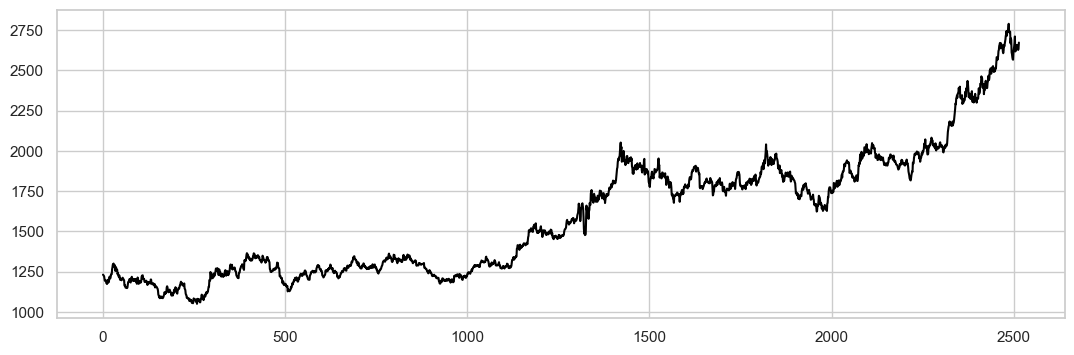

In [16]:
plt.figure(figsize=(13,4))
df['Price'].plot(color='black')
plt.show()

**setting the test size**

In [18]:
# deifne the number of days for test size
test_size = 60
test_size

60

**Gold Price Training and Test Sets Plot**

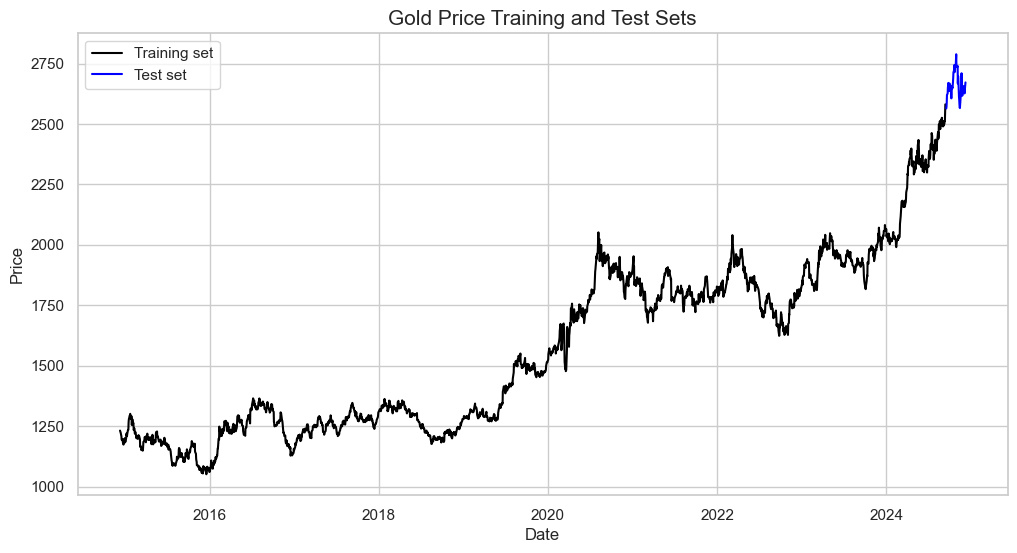

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][:-test_size], df['Price'][:-test_size], color='black')
plt.plot(df['Date'][-test_size:], df['Price'][-test_size:], color='blue')
plt.title('Gold Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [21]:
# scaling the data
scaler = MinMaxScaler()
scaler.fit(df['Price'].values.reshape(-1,1))

MinMaxScaler()

In [22]:
# Setting window size 
window_size = 60 #(60 days)

**Training Set:**

In [24]:
train_data = df['Price'][:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))

In [25]:
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])

**Testing Set:**

In [27]:
test_data = df['Price'][-test_size-window_size:]
test_data = scaler.transform(test_data.values.reshape(-1,1))

In [28]:
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-window_size:i, 0])
    y_test.append(test_data[i, 0])

**Convert the data into acceptable format**

In [30]:
# convert into data format that accepting by the model
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

In [31]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

In [32]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (2395, 60, 1)
y_train Shape:  (2395, 1)
X_test Shape:   (60, 60, 1)
y_test Shape:   (60, 1)


**Creating Model**

In [34]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=True)(input1)  
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    
    return model


**Model training**

In [36]:
import time 
t0 = time.time()

model = define_model()
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)

print(f'How long is this take to run: {time.time() - t0}')

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

How long is this take to run: 13.649752140045166


**Evaluate the model**

In [38]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test) 

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1769 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


In [39]:
MSE = mean_squared_error(y_test, y_pred)

In [40]:
print("Test Loss:", result)
print("Test MSE:", MSE)

Test Loss: 0.17575906217098236
Test MSE: 0.17575907750838213


In [41]:
# Inverse it to the normal scale 
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

In [42]:
MSE = mean_squared_error(y_test_true, y_test_pred)
print("Test Loss:", result)
print("Test MSE:", MSE)

Test Loss: 0.17575906217098236
Test MSE: 530722.3898989166


**Investigating the prices predicted with actual**

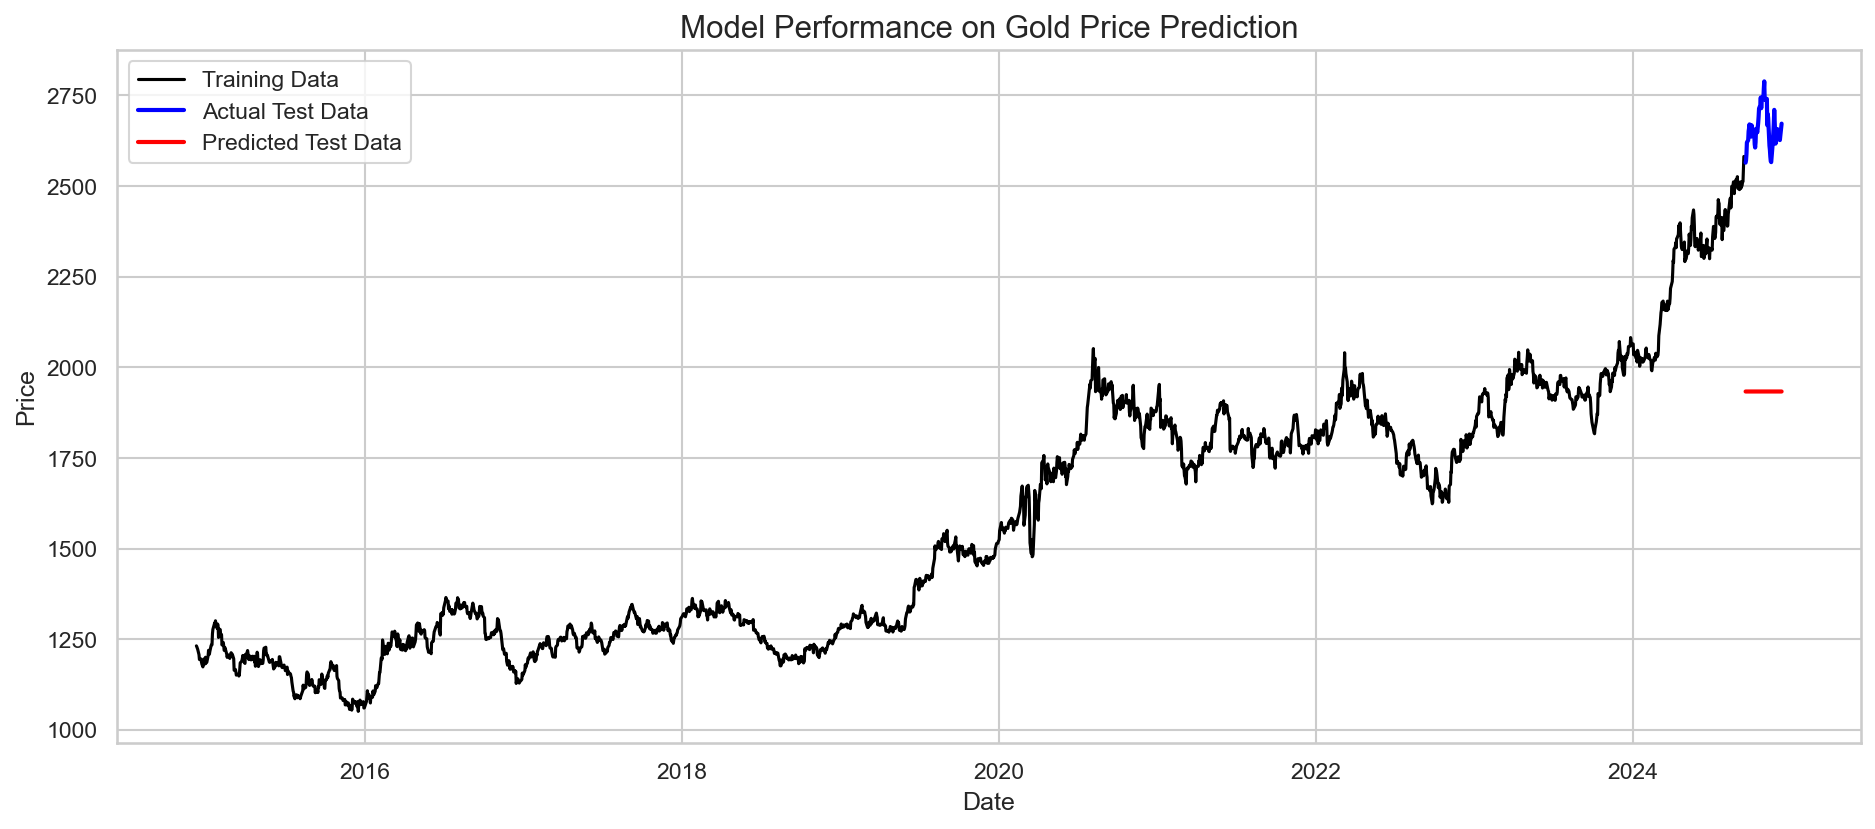

In [44]:
plt.figure(figsize=(15, 6), dpi=150)
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black')
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on Gold Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left')
plt.show()

# Data check 

In [46]:
df

,Date,Price,High,Low,Open
0,2014-12-09,1231.500000,1238.0,1202.0,1202.0
1,2014-12-10,1228.900024,1234.5999755859375,1226.5999755859375,1231.199951171875
2,2014-12-11,1225.099976,1231.199951171875,1216.199951171875,1226.5999755859375
3,2014-12-12,1222.000000,1227.800048828125,1216.199951171875,1227.800048828125
4,2014-12-15,1207.199951,1223.0999755859375,1198.4000244140625,1223.0999755859375
...,...,...,...,...,...
2510,2024-12-03,2644.699951,2654.699951171875,2636.0,2639.0
2511,2024-12-04,2653.800049,2658.300048828125,2637.0,2639.199951171875
2512,2024-12-05,2626.600098,2655.0,2625.699951171875,2652.39990234375
2513,2024-12-06,2638.600098,2643.10009765625,2617.5,2620.199951171875


In [47]:
df_k

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [130]:
# Ensure 'Date' columns are in datetime format for both dataframes
df['Date'] = pd.to_datetime(df['Date'])
df_k['Date'] = pd.to_datetime(df_k['Date'])

# Merge df and df1 on 'Date'
merged_df = pd.merge(df_k, df[['Date', 'Price']], on='Date', how='left')

In [132]:
df_k

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-12-30,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,2022-12-29,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,2022-12-28,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,2022-12-27,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,2022-12-26,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,2013-01-08,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,2013-01-07,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,2013-01-04,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,2013-01-03,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [134]:
merged_df.dropna(inplace=True)

In [136]:
merged_df

,Date,Price_x,Open,High,Low,Vol.,Change %,Price_y
0,2022-12-30,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%,1819.699951
1,2022-12-29,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%,1819.500000
2,2022-12-28,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%,1807.900024
3,2022-12-27,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%,1814.800049
5,2022-12-23,"1,804.20","1,801.00","1,812.20","1,798.90",105.46K,0.50%,1795.900024
...,...,...,...,...,...,...,...,...
2078,2014-12-15,"1,207.70","1,222.00","1,225.00","1,191.30",152.38K,-1.21%,1207.199951
2079,2014-12-12,"1,222.50","1,227.90","1,228.90","1,214.80",121.18K,-0.25%,1222.000000
2080,2014-12-11,"1,225.60","1,226.20","1,233.40","1,216.40",143.67K,-0.31%,1225.099976
2081,2014-12-10,"1,229.40","1,231.20","1,238.90","1,225.20",143.32K,-0.21%,1228.900024


In [138]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2027 entries, 0 to 2082
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2027 non-null   datetime64[ns]
 1   Price_x   2027 non-null   object        
 2   Open      2027 non-null   object        
 3   High      2027 non-null   object        
 4   Low       2027 non-null   object        
 5   Vol.      2027 non-null   object        
 6   Change %  2027 non-null   object        
 7   Price_y   2027 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 142.5+ KB


In [140]:
merged_df['Price_x'] = pd.to_numeric(merged_df['Price_x'], errors='coerce')

In [142]:
merged_df

,Date,Price_x,Open,High,Low,Vol.,Change %,Price_y
0,2022-12-30,NaN,"1,821.80","1,832.40","1,819.80",107.50K,0.01%,1819.699951
1,2022-12-29,NaN,"1,812.30","1,827.30","1,811.20",105.99K,0.56%,1819.500000
2,2022-12-28,NaN,"1,822.40","1,822.80","1,804.20",118.08K,-0.40%,1807.900024
3,2022-12-27,NaN,"1,808.20","1,841.90","1,808.00",159.62K,0.74%,1814.800049
5,2022-12-23,NaN,"1,801.00","1,812.20","1,798.90",105.46K,0.50%,1795.900024
...,...,...,...,...,...,...,...,...
2078,2014-12-15,NaN,"1,222.00","1,225.00","1,191.30",152.38K,-1.21%,1207.199951
2079,2014-12-12,NaN,"1,227.90","1,228.90","1,214.80",121.18K,-0.25%,1222.000000
2080,2014-12-11,NaN,"1,226.20","1,233.40","1,216.40",143.67K,-0.31%,1225.099976
2081,2014-12-10,NaN,"1,231.20","1,238.90","1,225.20",143.32K,-0.21%,1228.900024


In [126]:
merged_df['diff'] = merged_df['Price_x'] - merged_df['Price_y']

In [128]:
merged_df

,Date,Price_x,Open,High,Low,Vol.,Change %,Price_y,diff
0,2022-12-30,NaN,"1,821.80","1,832.40","1,819.80",107.50K,0.01%,1819.699951,NaN
1,2022-12-29,NaN,"1,812.30","1,827.30","1,811.20",105.99K,0.56%,1819.500000,NaN
2,2022-12-28,NaN,"1,822.40","1,822.80","1,804.20",118.08K,-0.40%,1807.900024,NaN
3,2022-12-27,NaN,"1,808.20","1,841.90","1,808.00",159.62K,0.74%,1814.800049,NaN
5,2022-12-23,NaN,"1,801.00","1,812.20","1,798.90",105.46K,0.50%,1795.900024,NaN
...,...,...,...,...,...,...,...,...,...
2078,2014-12-15,NaN,"1,222.00","1,225.00","1,191.30",152.38K,-1.21%,1207.199951,NaN
2079,2014-12-12,NaN,"1,227.90","1,228.90","1,214.80",121.18K,-0.25%,1222.000000,NaN
2080,2014-12-11,NaN,"1,226.20","1,233.40","1,216.40",143.67K,-0.31%,1225.099976,NaN
2081,2014-12-10,NaN,"1,231.20","1,238.90","1,225.20",143.32K,-0.21%,1228.900024,NaN
